# Target
- get tickers
- preprocessing
- visualize candle graph

## Set up , Auth , Get tickers , Market depth

In [2]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

# change to your api_key , api_secret 
api_key = ''
api_secret = ''

client = Client(api_key, api_secret)

# get all tickers
tickers = client.get_orderbook_tickers()

# all tickers wiil be in this list
products = []

for each in range(len(tickers)):
    products.append(tickers[each]['symbol'])


# 模糊搜尋應用
import difflib
# find related to BTC tickers ( for 100 data points )
res = difflib.get_close_matches('BTC',products,100,cutoff=0.6)
print(res)


['SCBTC', 'QIBTC', 'OPBTC', 'OMBTC', 'OGBTC', 'NUBTC', 'MCBTC', 'HCBTC', 'GOBTC', 'EZBTC', 'ARBTC', 'AEBTC', 'ZRXBTC', 'ZILBTC', 'ZENBTC', 'ZECBTC', 'YGGBTC', 'YFIBTC', 'XZCBTC', 'XVSBTC', 'XVGBTC', 'XTZBTC', 'XRPBTC', 'XNOBTC', 'XMRBTC', 'XLMBTC', 'XEMBTC', 'WTCBTC', 'WRXBTC', 'WPRBTC', 'WOOBTC', 'WINBTC', 'WANBTC', 'VIBBTC', 'VIABTC', 'VGXBTC', 'VETBTC', 'VENBTC', 'UTKBTC', 'USTBTC', 'UNIBTC', 'UMABTC', 'TWTBTC', 'TVKBTC', 'TRXBTC', 'TRUBTC', 'TRBBTC', 'TNTBTC', 'TNBBTC', 'TLMBTC', 'TKOBTC', 'TCTBTC', 'SYSBTC', 'SXPBTC', 'SUNBTC', 'SUBBTC', 'STXBTC', 'STGBTC', 'SSVBTC', 'SRMBTC', 'SOLBTC', 'SNXBTC', 'SNTBTC', 'SNMBTC', 'SKYBTC', 'SKLBTC', 'SFPBTC', 'RVNBTC', 'RSRBTC', 'RPXBTC', 'RLCBTC', 'RIFBTC', 'RGTBTC', 'REQBTC', 'REPBTC', 'RENBTC', 'RDNBTC', 'RCNBTC', 'RADBTC', 'QSPBTC', 'QNTBTC', 'QLCBTC', 'QKCBTC', 'PYRBTC', 'PSGBTC', 'PPTBTC', 'POEBTC', 'POABTC', 'PNTBTC', 'PLABTC', 'PHXBTC', 'PHBBTC', 'PHABTC', 'PAXBTC', 'OXTBTC', 'OSTBTC', 'ORNBTC', 'ONTBTC', 'ONGBTC', 'ONEBTC']


## Clean data and transfer to Pandas.dataframe foramt 

In [3]:
'''
klines =>
[
  [
    1499040000000,      // Open time
    "0.01634790",       // Open
    "0.80000000",       // High
    "0.01575800",       // Low
    "0.01577100",       // Close
    "148976.11427815",  // Volume
    1499644799999,      // Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "17928899.62484339" // Ignore
  ]
]
'''

'\nklines =>\n[\n  [\n    1499040000000,      // Open time\n    "0.01634790",       // Open\n    "0.80000000",       // High\n    "0.01575800",       // Low\n    "0.01577100",       // Close\n    "148976.11427815",  // Volume\n    1499644799999,      // Close time\n    "2434.19055334",    // Quote asset volume\n    308,                // Number of trades\n    "1756.87402397",    // Taker buy base asset volume\n    "28.46694368",      // Taker buy quote asset volume\n    "17928899.62484339" // Ignore\n  ]\n]\n'

### Preprocessing data 

In [10]:
from datetime import datetime
from unicodedata import numeric
import pandas as pd
# fetch data from api give specific time frame and start_time , end_time (optional), symbol 
klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_4HOUR, "1 Dec, 2021")

# put klines(two-dimensional array) to dataframe and give dataframe columns 
df = pd.DataFrame(klines, columns=['Open time', 'Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore'])


# processing data to datetime object
df['Open time'] = pd.to_datetime(df['Open time']/1000, unit='s')
df['Close time'] = pd.to_datetime(df['Close time']/1000 , unit='s')

# processing data to numeric type
numeric_col = ['Open','High','Low','Close','Volume','Quote asset volume','Taker buy base asset volume','Taker buy quote asset volume']

df[numeric_col] = df[numeric_col].apply(pd.to_numeric)

df.dtypes

Open time                       datetime64[ns]
Open                                   float64
High                                   float64
Low                                    float64
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                     float64
Number of trades                         int64
Taker buy base asset volume            float64
Taker buy quote asset volume           float64
Ignore                                  object
dtype: object

In [11]:
df.describe(include=object)

,Ignore
count,1791
unique,1
top,0
freq,1791


In [12]:
df.describe(include=float)

,Open,High,Low,Close,Volume,Quote asset volume,Taker buy base asset volume,Taker buy quote asset volume
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000
mean,0.070860,0.071311,0.070388,0.070853,19253.177108,1291.817340,9535.912990,640.497989
std,0.008071,0.008064,0.008070,0.008067,17804.844596,1006.297201,8749.464658,495.988660
min,0.050656,0.051964,0.049081,0.050647,2763.951100,182.634957,1348.862900,89.128357
25%,0.066962,0.067377,0.066492,0.066952,9420.041050,689.326238,4668.408500,338.886518
50%,0.071673,0.072104,0.071201,0.071668,14037.033500,1015.885383,6964.537900,496.214787
75%,0.076134,0.076573,0.075694,0.076110,22417.313250,1546.592640,11050.789400,768.455278
max,0.088027,0.088366,0.087669,0.088034,210473.579900,11133.265616,105095.446800,5558.936130


## Visualize

In [37]:
import mplfinance as mpf
# set index to Close time
df.set_index(['Close time'] , inplace=True)

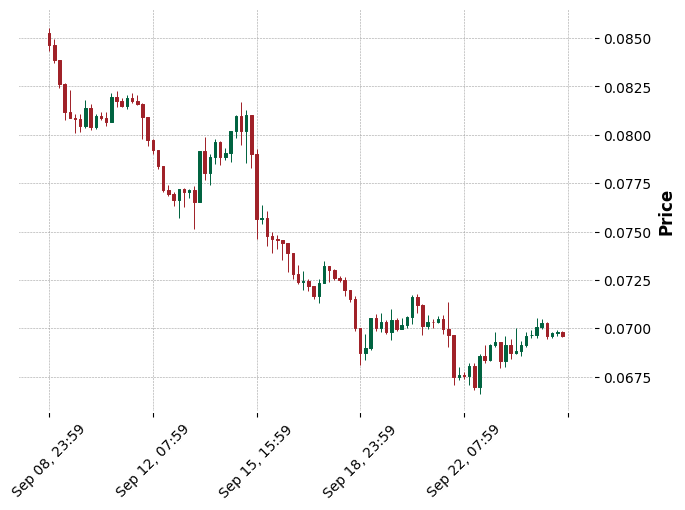

In [44]:
mpf.plot(df.tail(100) , type='candle' ,style='charles')